# **CP322 Machine Learning - Project**

## DATA EXPLORATION AND PREPROCESSING


IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

IMPORTING DATASET

In [3]:
df = pd.read_csv('heart_disease_health_indicators.csv')
X= df.iloc[:,1:].values
y= df.iloc[:,0].values
df.head(10)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,2,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [4]:
print(df.describe())

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253661.000000  253661.000000  253661.000000  253661.000000   
mean               0.094173       0.428990       0.424113       0.962667   
std                0.292070       0.494933       0.494209       0.189578   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253661.000000  253661.000000  253661.000000  253661.000000   
mean       28.382475       0.443186       0.040570       0.296904   
std         6.608638       0.496763       0.197292       0.698147   
min        12.000000       0.000000    

CHECKING FOR MISSING VALUES


In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


VISUALIZATION OF THE DATA TO DETECT OUTLIERS

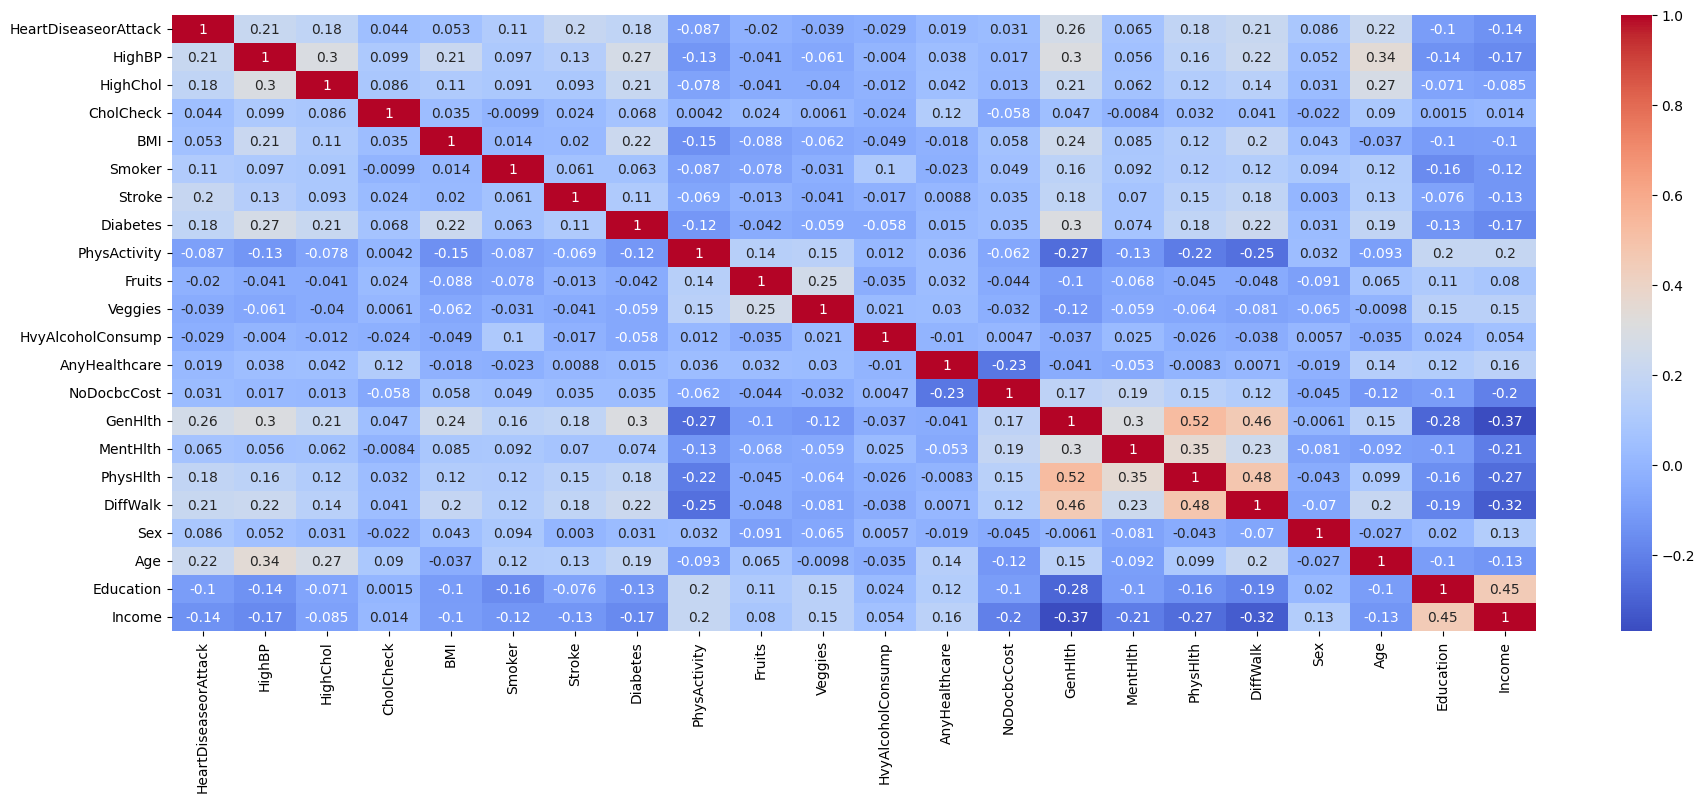

In [6]:
plt.figure(figsize=(22, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Adjusting the Dataset

In [7]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = df[df['HeartDiseaseorAttack'] == 0]
minority = df[df['HeartDiseaseorAttack'] == 1]

length = len(minority)*2
length = round(length)

lenMajor = round(length)


# Downsample the majority class
majority_downsampled = resample(majority,
                                replace=False,  # No replacement
                                n_samples=lenMajor,  # Match minority size
                                random_state=42)

minority_upsampled = resample(minority,
                                replace=True,  #replacement
                                n_samples=length,  # Match minority size
                                random_state=42)

# Combine minority and downsampled majority
bdf = pd.concat([minority_upsampled, majority_downsampled])

# Shuffle the dataset
bdf = bdf.sample(frac=1, random_state=42).reset_index(drop=True)

print(bdf.describe())
bdf.head(100)

       HeartDiseaseorAttack        HighBP      HighChol     CholCheck  \
count          95552.000000  95552.000000  95552.000000  95552.000000   
mean               0.500000      0.571741      0.547022      0.973732   
std                0.500003      0.494829      0.497787      0.159933   
min                0.000000      0.000000      0.000000      0.000000   
25%                0.000000      0.000000      0.000000      1.000000   
50%                0.500000      1.000000      1.000000      1.000000   
75%                1.000000      1.000000      1.000000      1.000000   
max                1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke      Diabetes  PhysActivity  \
count  95552.000000  95552.000000  95552.000000  95552.000000  95552.000000   
mean      28.837335      0.517540      0.094692      0.469148      0.706108   
std        6.681358      0.499695      0.292790      0.833586      0.455546   
min       12.000000      0

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,28,0,0,0,0,1,...,1,0,2,0,0,1,0,10,6,8
1,0,1,1,1,30,0,0,0,1,1,...,1,0,2,5,0,0,0,12,6,5
2,1,0,1,1,26,0,0,0,1,1,...,1,0,5,15,0,1,1,13,4,6
3,1,1,1,1,29,1,0,0,1,0,...,1,0,4,0,30,1,1,8,4,2
4,0,0,0,1,30,0,0,0,1,1,...,1,0,2,0,0,0,1,9,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,23,0,0,0,1,1,...,1,0,3,0,1,0,0,9,6,8
96,0,1,0,1,31,1,0,0,1,1,...,1,1,3,30,5,0,0,9,4,5
97,1,0,1,1,26,1,0,2,1,1,...,1,0,4,0,1,0,1,10,6,8
98,0,0,1,1,26,0,0,0,1,0,...,1,0,3,0,0,0,0,9,5,8


## FEATURE ENGINEERING


Feature Importances:
               Feature  Importance
0              HighBP    0.361119
18                Age    0.262538
13            GenHlth    0.254025
17                Sex    0.054961
1            HighChol    0.033973
5              Stroke    0.031907
6            Diabetes    0.000815
3                 BMI    0.000395
4              Smoker    0.000266
19          Education    0.000000
16           DiffWalk    0.000000
15           PhysHlth    0.000000
14           MentHlth    0.000000
10  HvyAlcoholConsump    0.000000
12        NoDocbcCost    0.000000
11      AnyHealthcare    0.000000
9             Veggies    0.000000
8              Fruits    0.000000
7        PhysActivity    0.000000
2           CholCheck    0.000000
20             Income    0.000000


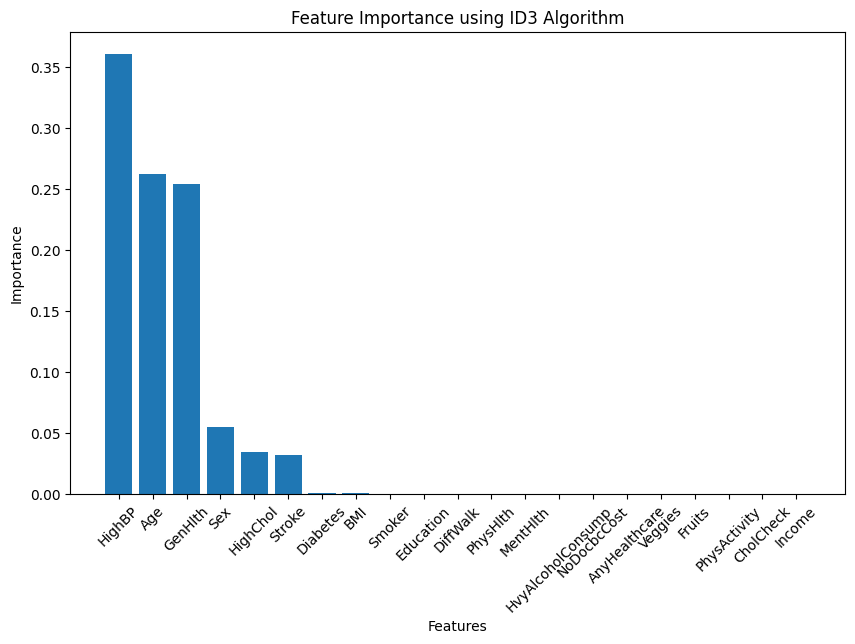

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score

# Splitting data into features (X) and target (y)
X = bdf.drop(columns=["HeartDiseaseorAttack"])
y = bdf["HeartDiseaseorAttack"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier with ID3 (criterion='entropy')
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Feature Importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importances["Feature"], feature_importances["Importance"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using ID3 Algorithm")
plt.xticks(rotation=45)
plt.show()


## MODEL IMPLEMENTATION

### Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for max_depth
param_grid = {'max_depth': range(1, 15)}

# Initialize Decision Tree Classifier
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Use GridSearchCV to find the best max_depth
grid_search = GridSearchCV(
    tree_model,
    param_grid,
    scoring='f1',  # You can change this to 'recall', 'precision', or 'accuracy'
    cv=5,          # 5-fold cross-validation
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the optimal max_depth
best_depth = grid_search.best_params_['max_depth']
print(f"Optimal max_depth: {best_depth}")

# Train the shallowest tree with the best depth
shallow_tree = DecisionTreeClassifier(max_depth=best_depth, class_weight='balanced', random_state=42)
shallow_tree.fit(X_train, y_train)

# Evaluate on the test set
y_pred = shallow_tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the shallow tree's rules
from sklearn.tree import export_text
print("Shallow Tree Rules:\n", export_text(shallow_tree, feature_names=X_train.columns.tolist()))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Optimal max_depth: 14
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.77     14301
           1       0.76      0.83      0.80     14365

    accuracy                           0.79     28666
   macro avg       0.79      0.79      0.79     28666
weighted avg       0.79      0.79      0.79     28666

Shallow Tree Rules:
 |--- HighBP <= 0.50
|   |--- Age <= 8.50
|   |   |--- GenHlth <= 3.50
|   |   |   |--- Stroke <= 0.50
|   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |--- DiffWalk <= 0.50
|   |   |   |   |   |   |--- GenHlth <= 2.50
|   |   |   |   |   |   |   |--- Age <= 4.50
|   |   |   |   |   |   |   |   |--- Income <= 4.50
|   |   |   |   |   |   |   |   |   |--- PhysHlth <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- Veggies <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Veggies >  0.50
|   |   |   |   |   |   |   | 

### Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_NB = nb_model.predict(X_test)
y_prob_NB = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

print("Classification Report:")
print(classification_report(y_test, y_pred_NB))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     14301
           1       0.75      0.70      0.72     14365

    accuracy                           0.73     28666
   macro avg       0.73      0.73      0.73     28666
weighted avg       0.73      0.73      0.73     28666



###Regression


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing
model = LogisticRegression(max_iter=500,random_state=42)

# Train
model.fit(X_train_scaled, y_train)

#  Predictions on the test data
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     14301
           1       0.76      0.80      0.78     14365

    accuracy                           0.77     28666
   macro avg       0.77      0.77      0.77     28666
weighted avg       0.77      0.77      0.77     28666



###k-Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaledKNN = scaler.fit_transform(X_train)
X_test_scaledKNN = scaler.transform(X_test)

# Train the kNN model on scaled data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_predKNN = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_predKNN))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76     14301
           1       0.74      0.83      0.78     14365

    accuracy                           0.77     28666
   macro avg       0.77      0.77      0.77     28666
weighted avg       0.77      0.77      0.77     28666



## MODEL EVALUATION

### Decision Trees


Model Performance Metrics:
Accuracy: 0.77
Precision: 0.76
Recall: 0.80
F1-Score: 0.78
ROC-AUC: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74     14301
           1       0.73      0.81      0.76     14365

    accuracy                           0.75     28666
   macro avg       0.75      0.75      0.75     28666
weighted avg       0.75      0.75      0.75     28666

ROC-AUC: 0.82


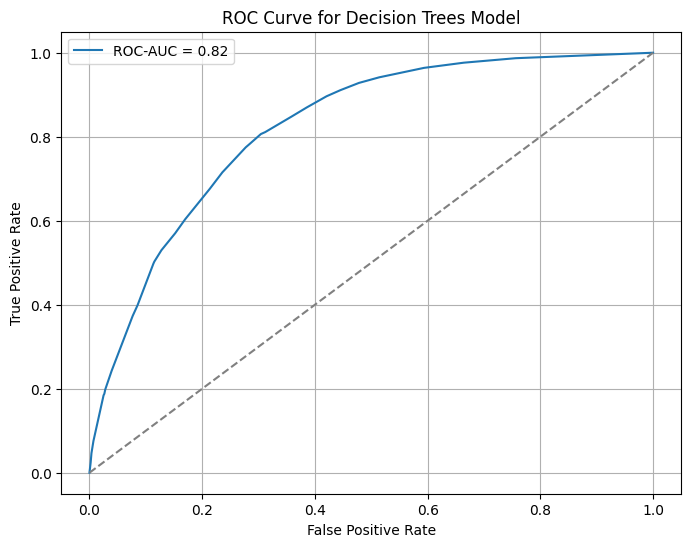

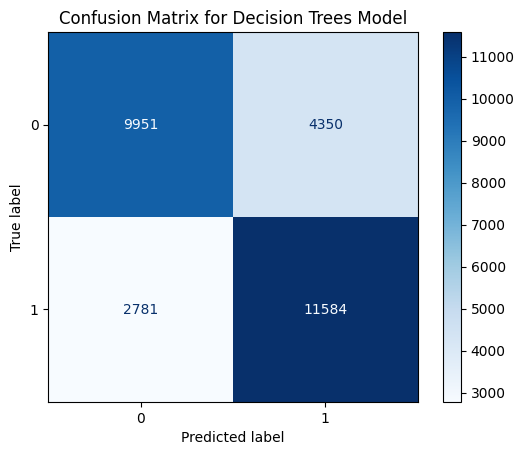

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Trees Model")
plt.legend()
plt.grid()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Trees Model")
plt.show()

### Naive Bayes


Model Performance Metrics:
Accuracy: 0.73
Precision: 0.75
Recall: 0.70
F1-Score: 0.72
ROC-AUC: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     14301
           1       0.75      0.70      0.72     14365

    accuracy                           0.73     28666
   macro avg       0.73      0.73      0.73     28666
weighted avg       0.73      0.73      0.73     28666



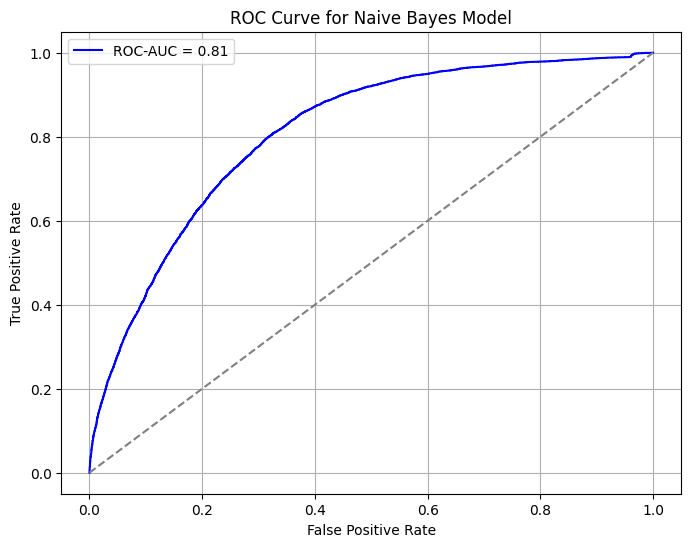

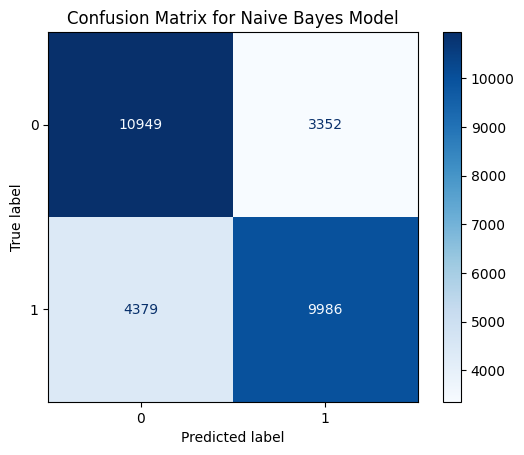

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred_NB)
precision = precision_score(y_test, y_pred_NB)
recall = recall_score(y_test, y_pred_NB)
f1 = f1_score(y_test, y_pred_NB)
roc_auc = roc_auc_score(y_test, y_prob_NB)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_NB))


# Generate and plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_NB)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes Model")
plt.legend()
plt.grid()
plt.show()

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

###Regression

Accuracy: 0.7724
Precision: 0.7610
Recall: 0.7958
F1-Score: 0.7780
ROC-AUC: 0.8141


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


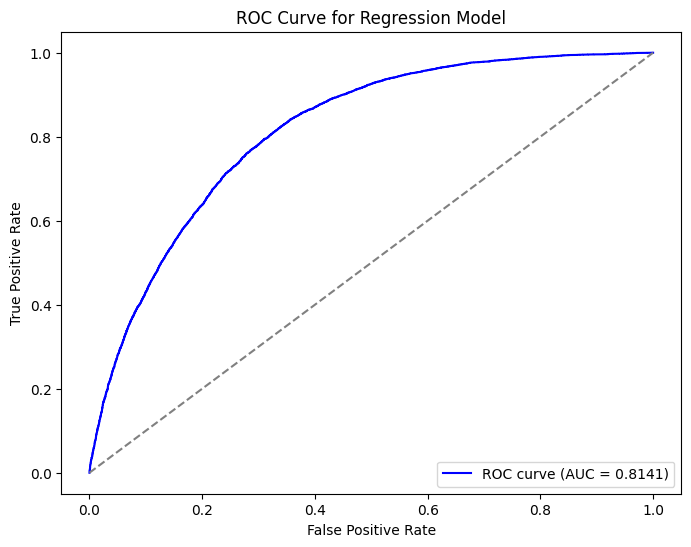

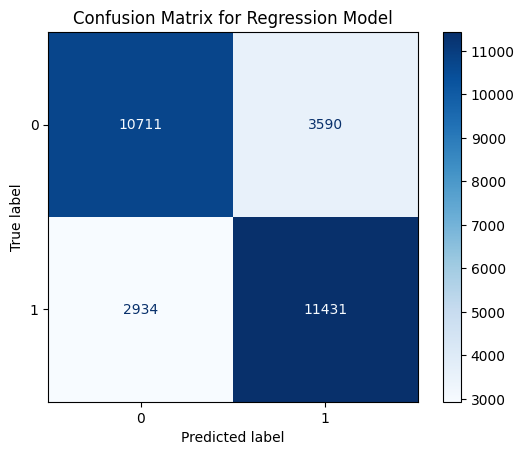

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.4f}")


# Predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Regression Model')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Regression Model")
plt.show()

###k-Nearest Neighbors

Accuracy: 0.7715
Precision: 0.7450
Recall: 0.8271
F1-Score: 0.7839
ROC-AUC: 0.8373


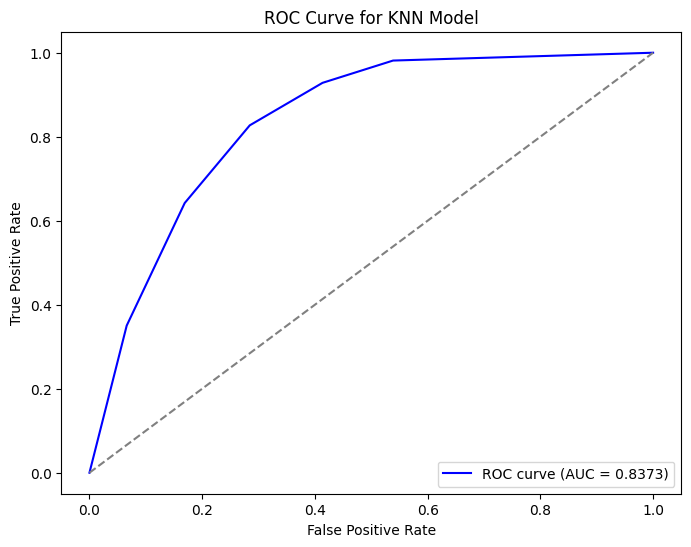

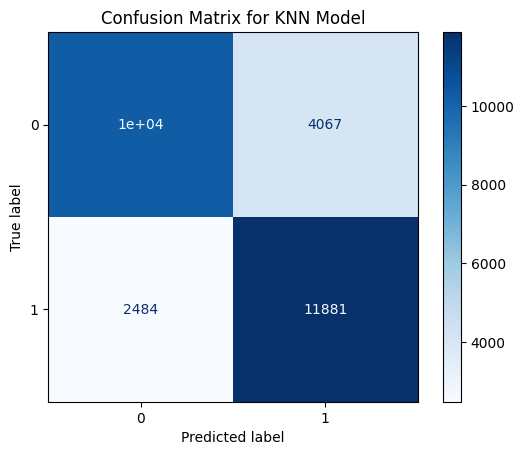

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Accuracy
accuracy = accuracy_score(y_test, y_predKNN)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_predKNN)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_predKNN)
print(f"Recall: {recall:.4f}")

# F1-Score
f1 = f1_score(y_test, y_predKNN)
print(f"F1-Score: {f1:.4f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaledKNN)[:, 1])
print(f"ROC-AUC: {roc_auc:.4f}")

# Predicted probabilities for the positive class
y_prob = knn.predict_proba(X_test_scaledKNN)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_predKNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for KNN Model")
plt.show()

## VISUALIZATION AND REPORTING

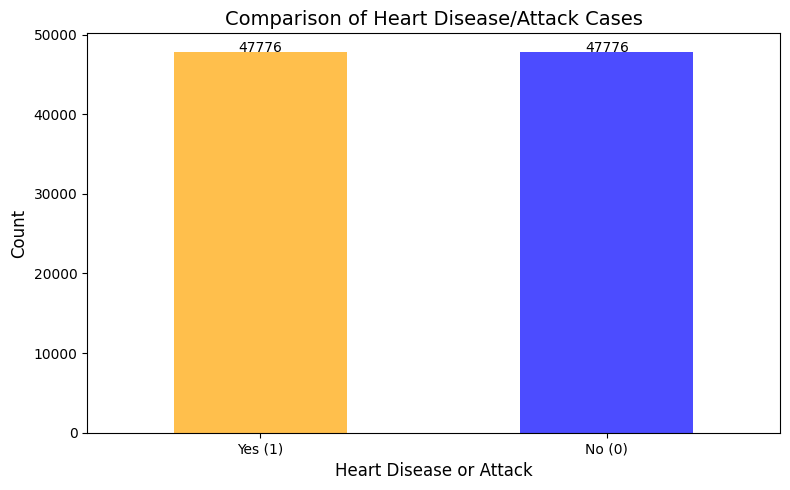

In [25]:
# Calculate the counts for each HeartDiseaseorAttack category
counts = bdf["HeartDiseaseorAttack"].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color=["orange", "blue"], alpha=0.7)

# Add labels and title
plt.xlabel("Heart Disease or Attack", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Comparison of Heart Disease/Attack Cases", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Yes (1)", "No (0)"], rotation=0)

# Add value annotations
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

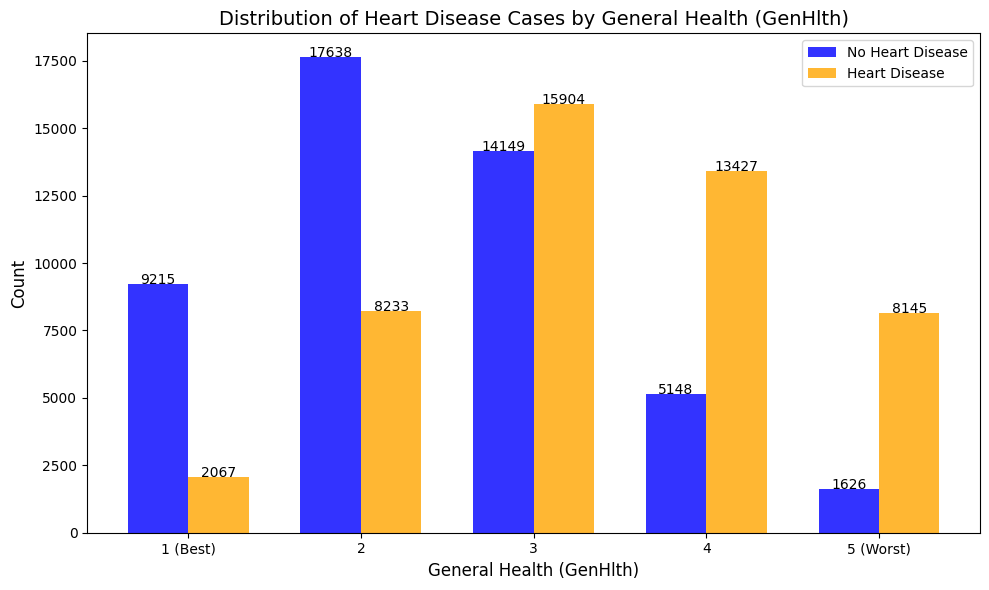

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences of each GenHlth value for both categories
genhlth_no_disease = bdf[bdf['HeartDiseaseorAttack'] == 0]['GenHlth'].value_counts().sort_index()
genhlth_with_disease = bdf[bdf['HeartDiseaseorAttack'] == 1]['GenHlth'].value_counts().sort_index()

# Create indices for the x-axis
x = np.arange(len(genhlth_no_disease.index))

# Plotting
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars

# Bars for no heart disease
plt.bar(x - width / 2, genhlth_no_disease.values, width, label='No Heart Disease', color='blue', alpha=0.8)

# Bars for heart disease
plt.bar(x + width / 2, genhlth_with_disease.values, width, label='Heart Disease', color='orange', alpha=0.8)

# Add values above the bars
for i, value in enumerate(genhlth_no_disease.values):
    plt.text(i - width / 2, value + 0.5, str(value), ha='center', fontsize=10)

for i, value in enumerate(genhlth_with_disease.values):
    plt.text(i + width / 2, value + 0.5, str(value), ha='center', fontsize=10)

# Add labels and title
plt.xlabel('General Health (GenHlth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease Cases by General Health (GenHlth)', fontsize=14)
plt.xticks(ticks=x, labels=['1 (Best)', '2', '3', '4', '5 (Worst)'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


As we can see the average General Health of people within our dataset have a rating of 2. We can also observe that that the ratio of no heart disease or attack with people are the least at 1 and subsequently increase at 5. Further supporting the correlation that having a General Health rating of 5 results in greater likelihood of heart disease/attack.

<ipython-input-27-6c16d249ee35>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = bdf.groupby(['AgeRange', 'HeartDiseaseorAttack']).size().unstack(fill_value=0)


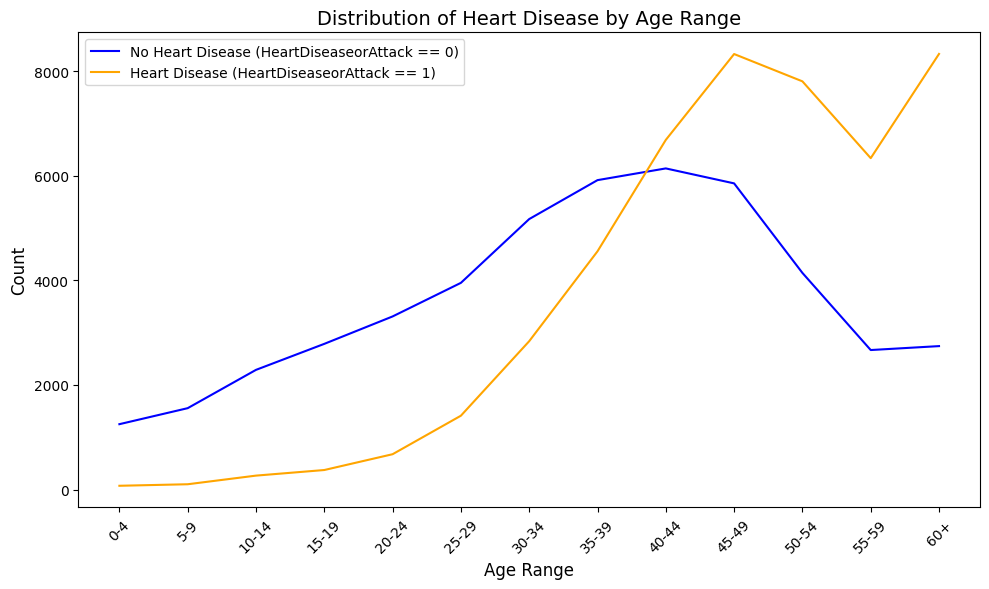

In [27]:
# Mapping encoded age to real age ranges
age_mapping = {
    1: '0-4', 2: '5-9', 3: '10-14', 4: '15-19', 5: '20-24',
    6: '25-29', 7: '30-34', 8: '35-39', 9: '40-44', 10: '45-49',
    11: '50-54', 12: '55-59', 13: '60+'
}

# Map the Age column to the age range
bdf['AgeRange'] = bdf['Age'].map(age_mapping)

# Convert the 'AgeRange' to a categorical variable with a specific order
age_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']
bdf['AgeRange'] = pd.Categorical(bdf['AgeRange'], categories=age_order, ordered=True)

# Group by the age range and HeartDiseaseorAttack, and count the occurrences
age_grouped = bdf.groupby(['AgeRange', 'HeartDiseaseorAttack']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the non-disease (HeartDiseaseorAttack == 0) and disease (HeartDiseaseorAttack == 1)
plt.plot(age_grouped.index, age_grouped[0], label='No Heart Disease (HeartDiseaseorAttack == 0)', color='blue')
plt.plot(age_grouped.index, age_grouped[1], label='Heart Disease (HeartDiseaseorAttack == 1)', color='orange')

# Add labels and title
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease by Age Range', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

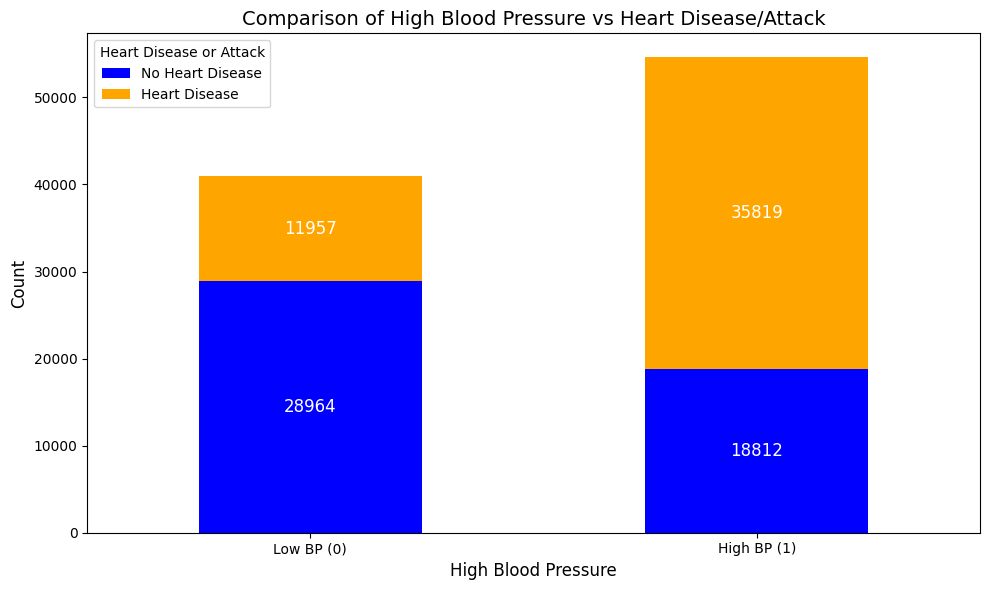

In [28]:
# Group by HighBP and HeartDiseaseorAttack, and count the occurrences
bp_grouped = bdf.groupby(['HighBP', 'HeartDiseaseorAttack']).size().unstack(fill_value=0)

# Plotting
ax = bp_grouped.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))

# Add values within the bars
for p in ax.patches:
    # Get the height and width of each bar segment
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Add the text in the middle of each segment
    ax.text(x, y, int(height), ha='center', va='center', fontsize=12, color='white')

# Add labels and title
plt.xlabel('High Blood Pressure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Comparison of High Blood Pressure vs Heart Disease/Attack', fontsize=14)
plt.xticks([0, 1], ['Low BP (0)', 'High BP (1)'], rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease'], title='Heart Disease or Attack')

# Show the plot
plt.tight_layout()
plt.show()

Again we see a similar pattern where the ratio of no heart disease/attack become closer.